## Simulate data

In [ ]:
import string
import random

def simread():
    bases=['A','C','G','T']
    read = "".join([random.choice(bases) for i in range(100)])
    qual = "".join([random.choice(string.printable[0:67]) for i in range(100)])
    return read,qual

def sim_fastq(numreads):
    fileout = open('sample.fastq','w')
    
    for i in range(numreads):
        fileout.write('@read'+str(i)+"\n")
        read,qual = simread()
        fileout.write(read+"\n")
        fileout.write('+'+"\n")
        fileout.write(qual+"\n")
    fileout.close()
    
sim_fastq(100)

## Counting patterns in data (e.g. DNA sequences)

Based on your experience with the bash shell during the past two weeks you should be able to:  
manipulate files  
use variables  
use loops to repeat commands  
save a series of commands as a script and run it

We will now begin using python to do more sophisticated analyses

### Begin by opening the file

Specify the file using a string variable  
Open the file  
Read it into memory, line by line  
This creates a list where each line is an item in that list

In [5]:
filename = 'sample.fastq'
f = open(filename,'r')
fastq = f.readlines()

To show the contents of the list we can type

In [ ]:
print fastq

Let's not do that - it could be a very long list  
Instead, let's print the first item

In [ ]:
print fastq[0]

Notice the first item is actually given as 0

Now let's look at the first few lines  
In python you can specify the items in the list you want    
In this case we'll get 0 (the first line is 0) up to (but not including) line 10  

In [ ]:
fastq[0:10]

Notice each line is its own item in the list  
Also the fastq file contains more than just the sequence  
The sequencer stores the name of the read and the quality of each base  

Let's find just the sequences - that's the 2nd line (item 1) and every fourth line after that

In [ ]:
print fastq[1]
print fastq[5]
print fastq[9]

## Challenge: what characterizes the lines with the sequences?

Reads are on lines where:  
the line number = 1+4n  
or: if line number / 4 leaves a remainder of 1  
in python we use % (modulo) to specify the remainder

Let's go through each line in the file (we'll limit it to the first 20)

Remember for loops in shell? It's easier in python

In [62]:
print 1%4
print 5%4

for line in fastq[0:20]:
    pass

1
1


In the last loop we got the item in the line, but not the line number  
Let's also include the line number using "enumerate" so we can find our sequences

In [ ]:
for line_num,line in enumerate(fastq[0:20]):
    pass

Now we can print each sequence by checking that it's a sequence line using modulo  
note we're using an if statement

In [ ]:
for line_num,line in enumerate(fastq[0:20]):
    #if line number / 4 leaves a remainder of 1
    if line_num%4 == 1:
        print line

Now that we can get our sequence data we can look for patterns  
The first pattern is just to count the number of each base  
Before we can count them, we need to access each base

## Challenge: add a line to iterate over each base in the line
use a subset of your data to check that you are getting the expected results

In [10]:
for line_num,line in enumerate(fastq[0:20]):
    if line_num%4 == 1:
        for base in line:
            pass

Now we can access each base  
Let's check if it's an 'A' using an if statement

In [11]:
for line_num,line in enumerate(fastq[0:20]):
    if line_num%4 == 1:
        for base in line:
            if base == 'A':
                pass

Now let's count all the A's  
We specify a variable for counting  
When we're done we print the number in the acounter variable

In [ ]:
acounter = 0
for line_num,line in enumerate(fastq):
    if line_num%4 == 1:
        for base in line:
            if base == 'A':
                acounter = acounter+1
print acounter    

## Challenge: now count each of the bases

In [ ]:
acounter = 0
ccounter = 0
gcounter = 0
tcounter = 0
for line_num,line in enumerate(fastq):
    if line_num%4 == 1:
        for base in line:
            if base == 'A':
                acounter = acounter+1
            if base == 'C':
                ccounter = ccounter+1
            if base == 'G':
                gcounter = gcounter+1
            if base == 'T':
                tcounter = tcounter+1
print acounter, ccounter, gcounter, tcounter  

That works, but it only works because we know our four bases  
Even then, it's a lot of typing or copy / paste  
That's prone to error  
## Challenge: now count each of the bases using just one variable

In [ ]:
counter = [0,0,0,0]
for line_num,line in enumerate(fastq):
    if line_num%4 == 1:
        for base in line:
            if base == 'A':
                counter[0] = counter[0]+1
            if base == 'C':
                counter[1] = counter[1]+1
            if base == 'G':
                counter[2] = counter[2]+1
            if base == 'T':
                counter[3] = counter[3]+1
print counter

Note we're checking each base four times so even if it's an 'A' we're still checking whether it's a 'C', etc.  
Let's expand our if statement to  
if, else if (elif), and else

In [23]:
counter = [0,0,0,0]
for line_num,line in enumerate(fastq):
    if line_num%4 == 1:
        for base in line:
            if base == 'A':
                counter[0] = counter[0]+1
            elif base == 'C':
                counter[1] = counter[1]+1
            elif base == 'G':
                counter[2] = counter[2]+1
            elif base == 'T':
                counter[3] = counter[3]+1
print counter

[2517, 2550, 2489, 2444]


That's better: we only have one variable instead of four  
But we're still checking each base individually  
In a minute, we're going to count 2-base patterns  
e.g. how many 'AA' or 'AT' - there are 16 of those

We've used strings and lists, now we will use a data structure called a dictionary, which looks like  
word: definition  
word2: definition2  
word3: definition3  
word4: definition4  

Let's do this for our data, where the "word" is the base, and the "definition" is our count

In [20]:
{'A':0,
'C':0,
'G':0,
'T':0}

{'A': 0, 'C': 0, 'T': 0, 'G': 0}


In [ ]:
counter = {'A':0,
'C':0,
'G':0,
'T':0}

print counter

That doesn't look much different than our list  
However, notice that each count has a label  
As with a dictionary of words we can access our counts by the word  
We do this in the same format as for lists, except access is by name not position in the list

In [19]:
print counter['A']

0


Let's go back to our pattern counting - now using a dictionary

In [21]:
counter={'A':0,'C':0,'G':0,'T':0}
for line_number,line in enumerate(fastq):
    if line_number%4 == 1:
        for base in line:
            counter[base] = counter[base] + 1
            
print counter

KeyError: '\n'

Oops - we have an error - the key is the thing we're trying to look up in the dictionary  
In this case it's a newline character  
You can see it when you print part of the list

In [ ]:
print fastq[0:1]

We need to "strip" the newline from each line  
For example

In [ ]:
for line in fastq[0:2]:
    print line
    print line.rstrip()

In [ ]:
counter={'A':0,'C':0,'G':0,'T':0}
for line_number,line in enumerate(fastq):
    #if it's a sequencing read: if it's line 1+4n: if line number / 4 leaves a remainder of 1
    if line_number%4==1:
        line=line.rstrip()
        for base in line:
            counter[base]+=1
            
print counter

Now we can count the number of each base  

## Challenge: modify the script to count each pair of bases e.g. 'CG'  
hint: first modify your script to access the base by its position

In [69]:
counter={'AA':0,'AC':0,'AG':0,'AT':0,
             'CA':0,'CC':0,'CG':0,'CT':0,
             'GA':0,'GC':0,'GG':0,'GT':0,
             'TA':0,'TC':0,'TG':0,'TT':0}
for line_number,line in enumerate(fastq):
    if line_number%4==1:
        line=line.rstrip()
        for base_num,base in enumerate(line):
            if base_num < len(line)-1: #or see below
                pair = base+line[base_num+1]
                pair = line[base_num:base_num+2] #if len(pair)==2
                counter[pair]+=1
            
print counter

{'AA': 632, 'AC': 665, 'GT': 627, 'AG': 627, 'CC': 630, 'CA': 638, 'CG': 623, 'TT': 583, 'GG': 581, 'GC': 620, 'AT': 574, 'GA': 633, 'TG': 628, 'TA': 588, 'TC': 615, 'CT': 636}


### Common difficulties with this challenge:  
How do you get the two-base string?  
- Did you add the current base to the next base?
- Do you use the index of the current base to access a range of bases in the line? Did you remember ranges are non-inclusive?  

How do you handle the last base in the line, which has no next base?

### It's really hard to compare all these numbers - let's make a graph

In [72]:
import matplotlib.pyplot as pyplot  #note "import" to get some useful pre-built features
#makes it plot right in the notebook
%matplotlib inline  

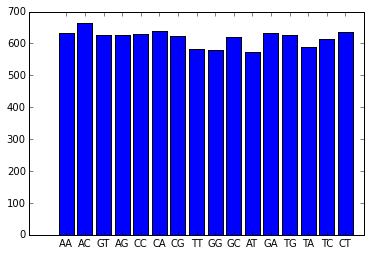

In [73]:
pyplot.bar(range(len(counter)), counter.values(),align='center');
pyplot.xticks(range(len(counter)), counter.keys());

## Challenge: Count pairs of bases assuming you don't know in advance the possible pairs  
i.e. the dictionary should start out empty

In [47]:
counter={}
for line_number,line in enumerate(fastq):
    if line_number%4==1:
        line=line.rstrip()
        for base_num,base in enumerate(line):
            if base_num < len(line)-1:
                pair = base+line[base_num+1]
                pair = line[base_num:base_num+2]
                if pair in counter:
                    counter[pair]+=1
                else:
                    counter[pair]=1
            
print counter

{'AA': 632, 'AC': 665, 'GT': 627, 'AG': 627, 'CC': 630, 'TT': 583, 'CG': 623, 'TC': 615, 'GG': 581, 'GC': 620, 'AT': 574, 'GA': 633, 'TG': 628, 'CT': 636, 'CA': 638, 'TA': 588}


### Common difficulties with this challenge:  
How to check if a "key" is in the dictionary  
How to insert a new "key":"value" pair in the dictionary

## Challenge: Make it possible to count kmers of any length by changing the value of a variable

In [55]:
#this counts kmers of length X
X=9
counter={}
for line_number,line in enumerate(fastq):
    if line_number%4 == 1:
        line=line.rstrip()
        for base_num,base in enumerate(line):
            this_kmer = line[base_num:base_num+X]
            if len(this_kmer) == X:   #a different way to solve the end-of-line problem
                if this_kmer in counter:
                    counter[this_kmer]+=1
                else:
                    counter[this_kmer]=1
                
print 'There were '+str(len(counter))+' kmers'
print 'There are '+str(4**X)+' possible kmers of length '+str(X)
#print 'There are '+str(100*(100-X+1))+' possible kmers'

There were 9055 kmers
There are 262144 possible kmers of length 9
